### Inciso A: Ley débil de los grandes números

In [1]:
# Imports necesarios.
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

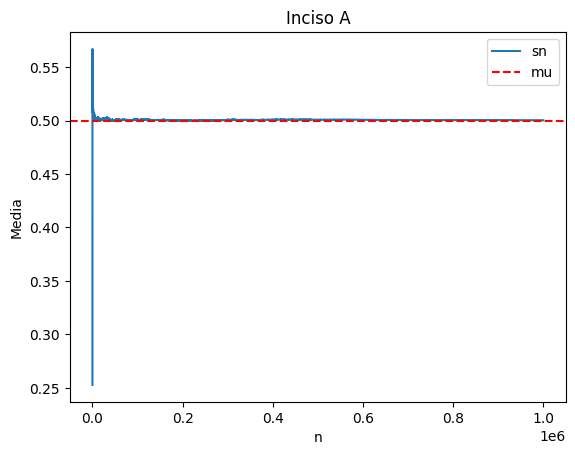

In [2]:
def generar_muestras_uniformes(n):

    """
    Generador de las muestras de manera uniforme.
    """

    return np.random.uniform(0, 1, n)

def calcular_medias_parciales(muestras):

    """
    Método para calcular las medias parciales.
    """

    medias_parciales = np.cumsum(muestras) / np.arange(1, len(muestras) + 1)
    return medias_parciales

def graficar_medias_parciales(medias_parciales, mu):

    """
    Gráfica de las medias parciales.
    """

    plt.plot(range(1, len(medias_parciales) + 1), medias_parciales, label='sn')
    plt.axhline(y=mu, color='r', linestyle='--', label='mu')
    plt.xlabel('n')
    plt.ylabel('Media')
    plt.legend()
    plt.title('Inciso A')

n = 1000000 # Definiendo el tamaño de la muestra.
muestras = generar_muestras_uniformes(n) # Generando n números aleatorios.
mu = 0.5  # La media de la distribución uniforme en el intervalo (0, 1) es 0.5
medias_parciales = calcular_medias_parciales(muestras) # Calculando la media parcial.
graficar_medias_parciales(medias_parciales, mu) # Graficándola.

plt.show()


### Inciso B: Teorema del límite central

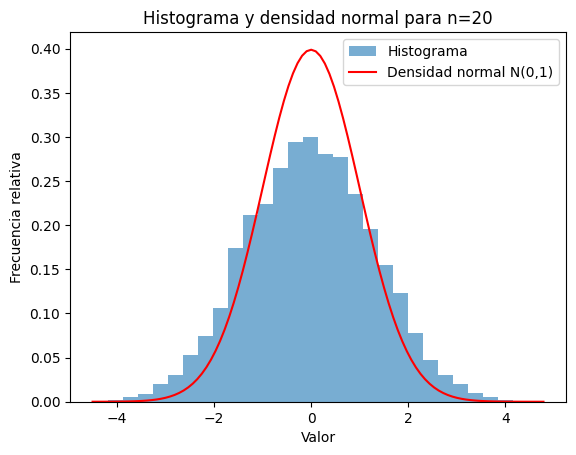

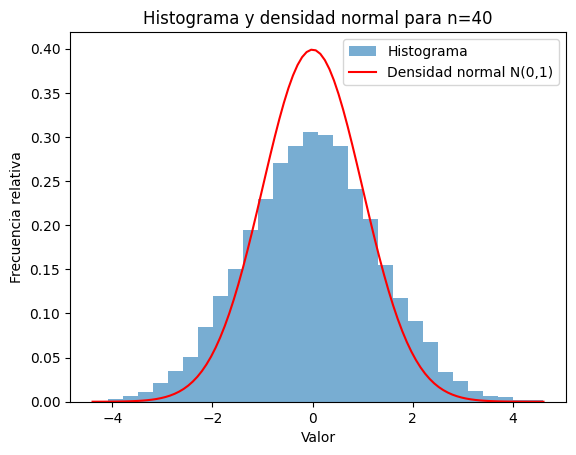

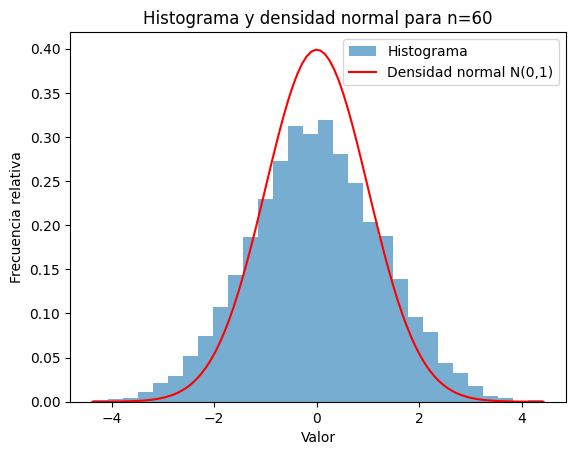

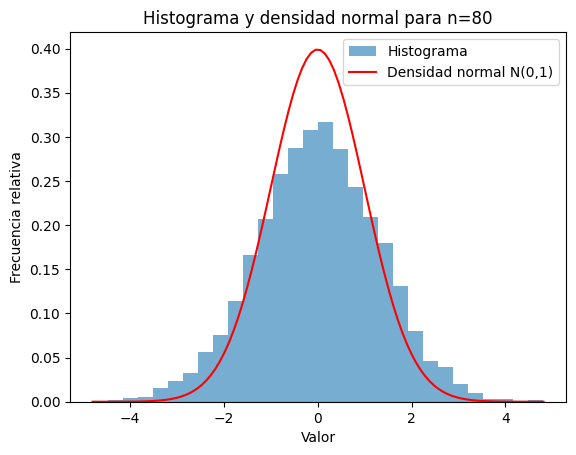

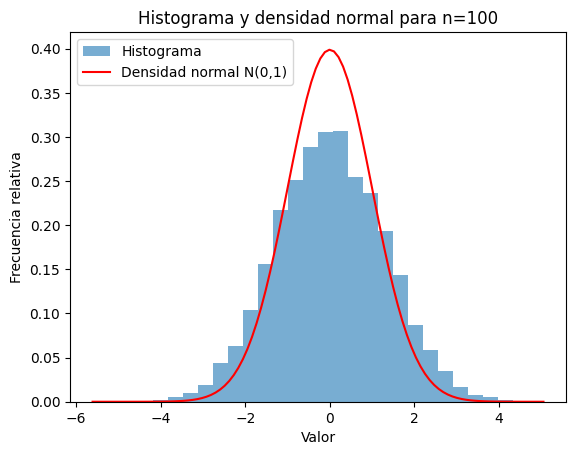

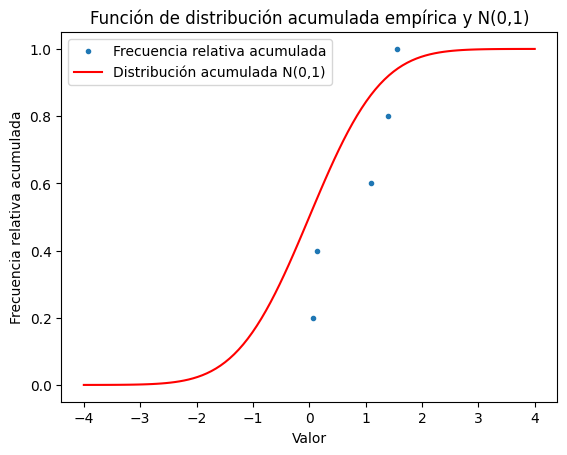

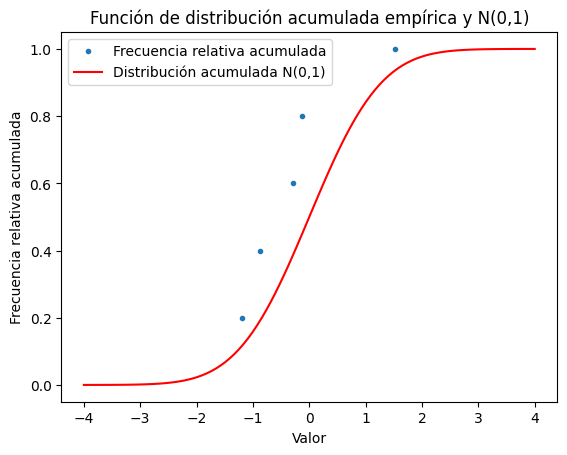

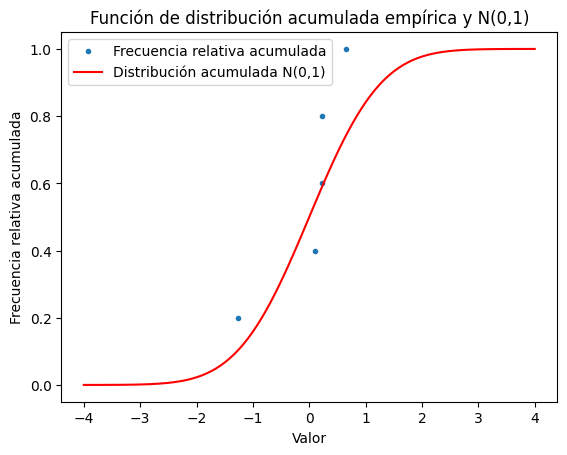

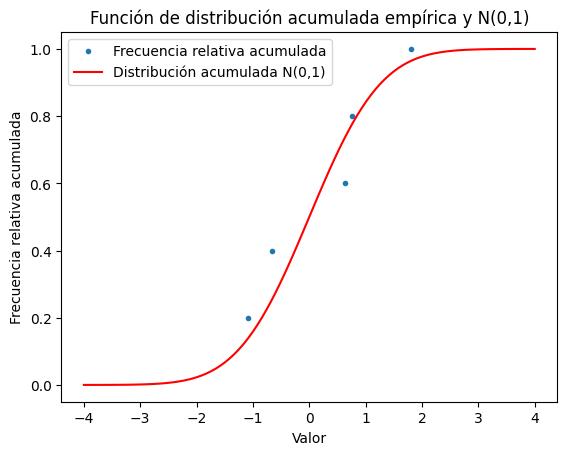

In [13]:
def generar_muestras_uniformes(n):
    return np.random.uniform(0, 1, n)

def calcular_media(muestras):
    return np.mean(muestras)

def calcular_varianza(muestras):
    return np.var(muestras)

def calcular_media_normalizada(media_muestra, mu, var, n):
    return (media_muestra - mu) / (np.sqrt(var / n))

def graficar_histograma_y_densidad_normal(datos, titulo, bins=30):
    datos = np.array(datos)
    plt.hist(datos, bins=bins, density=True, alpha=0.6, label='Histograma')
    x = np.linspace(datos.min(), datos.max(), 100)
    plt.plot(x, norm.pdf(x), 'r', label='Densidad normal N(0,1)')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia relativa')
    plt.title(titulo)
    plt.legend()
    plt.show()

def graficar_distribucion_acumulada_empirica(datos):
    datos_ordenados = np.sort(datos)
    y = np.arange(1, len(datos) + 1) / len(datos)
    plt.plot(datos_ordenados, y, marker='.', linestyle='none', label='Frecuencia relativa acumulada')
    x = np.linspace(-4, 4, 100)
    plt.plot(x, norm.cdf(x), 'r', label='Distribución acumulada N(0,1)')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia relativa acumulada')
    plt.title('Función de distribución acumulada empírica y N(0,1)')
    plt.legend()
    plt.show()

ns = [20, 40, 60, 80, 100]
Ns = [50, 100, 1000, 10000]

mu = 0.5  # Media de la distribución uniforme en (0, 1)
variance = 0.05  # Nueva varianza de la distribución uniforme en (0, 1)

for n in ns:
    sample_means = [calcular_media(generar_muestras_uniformes(n)) for _ in range(max(Ns))]
    normalized_means = [calcular_media_normalizada(mean, mu, variance, n) for mean in sample_means]
    graficar_histograma_y_densidad_normal(normalized_means, f'Histograma y densidad normal para n={n}')

for N in Ns:
    sample_means = [calcular_media(generar_muestras_uniformes(n)) for _ in range(N)]
    normalized_means = [calcular_media_normalizada(mean, mu, variance, n) for n, mean in zip(ns, sample_means)]
    graficar_distribucion_acumulada_empirica(normalized_means)